<a href="https://colab.research.google.com/github/chielgroen1998/MLOps/blob/main/datacollection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install alpha_vantage
!pip install xgboost
!pip install pandas_ta==0.3.14b0
!pip install optuna
!pip install --upgrade pyspark==3.3.0 delta-spark==2.2.0
!pip install --upgrade numpy
!pip install --upgrade pandas_ta


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 55.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.5
    Uninstalling numpy-2.2.5:
      Successfully uninstalled numpy-2.2.5


In [2]:
import pandas as pd
import numpy as np
np.NaN = np.nan
import pandas_ta as ta
import optuna
import logging
from datetime import timedelta
from alpha_vantage.timeseries import TimeSeries

add more data visualizations and insights

after engineering move to pyspark, describe in report why

transforming (remove nulls after cuz its about loading the data in first)

removing rows or mean imputation without a rolling window is not smart because of the timeseries nature of stocks, it would ruin indications of growing or shrinking trends in price


In [3]:
import matplotlib.pyplot as plt

Data for LIT:
            1. open  2. high  3. low  4. close  5. volume
date                                                     
2025-05-19    37.89  38.2600   37.89     38.20   220562.0
2025-05-16    38.48  38.6000   38.30     38.58   143462.0
2025-05-15    38.82  38.9662   38.47     38.74   128908.0
2025-05-14    39.29  39.5500   39.16     39.24   120114.0
2025-05-13    38.85  39.2800   38.85     39.19   164627.0


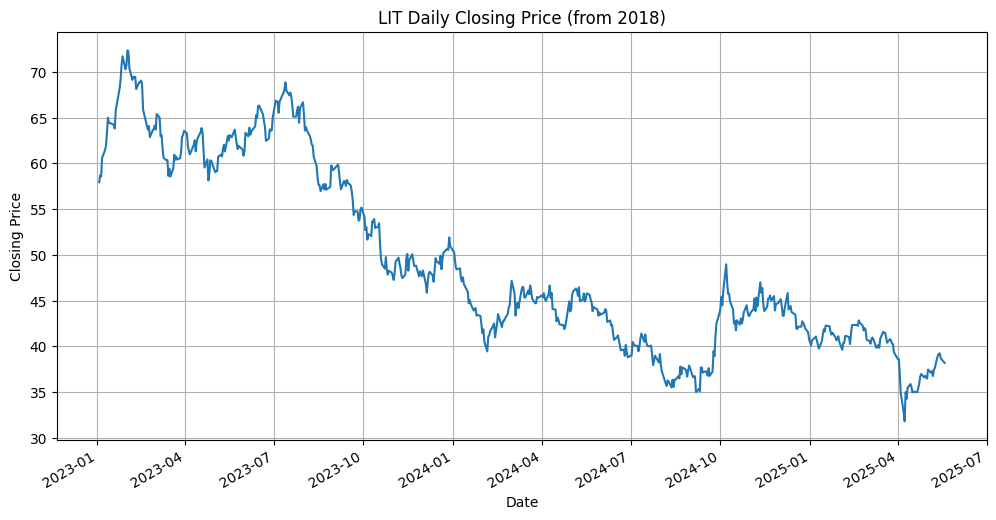

Data for REMX:
            1. open  2. high   3. low  4. close  5. volume
date                                                      
2025-05-19    38.28    38.28  37.8200     38.15   114099.0
2025-05-16    39.41    39.41  38.9400     39.31   103116.0
2025-05-15    39.65    39.86  39.1900     39.67   141722.0
2025-05-14    40.08    40.29  39.6337     39.77   126862.0
2025-05-13    39.86    40.10  39.6200     39.93    52374.0


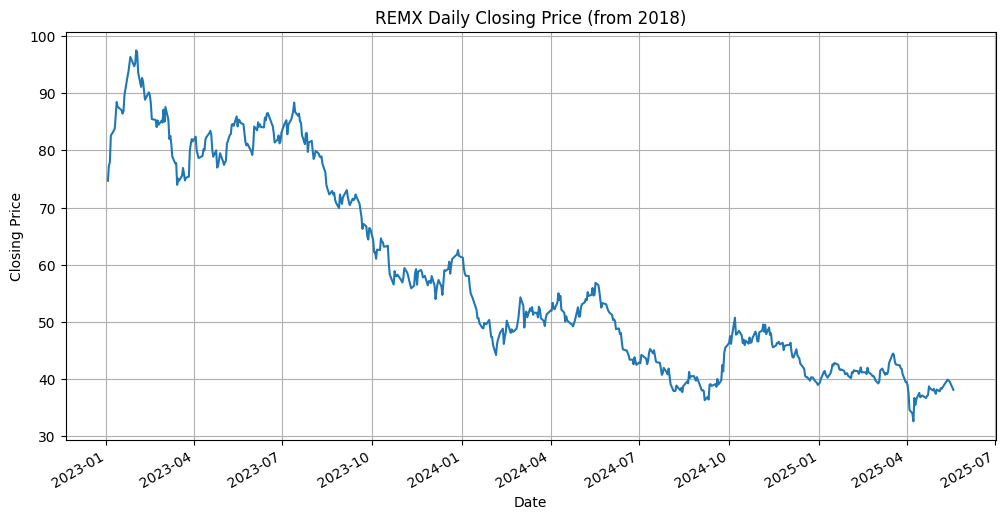

Data for URA:
            1. open  2. high   3. low  4. close  5. volume
date                                                      
2025-05-19    27.28   27.890  27.2601     27.81  2081668.0
2025-05-16    28.05   28.160  27.5701     27.71  2220237.0
2025-05-15    27.92   28.090  27.5701     28.01  2131299.0
2025-05-14    27.96   28.305  27.8600     28.15  2212220.0
2025-05-13    27.34   28.000  27.3000     27.84  3082168.0


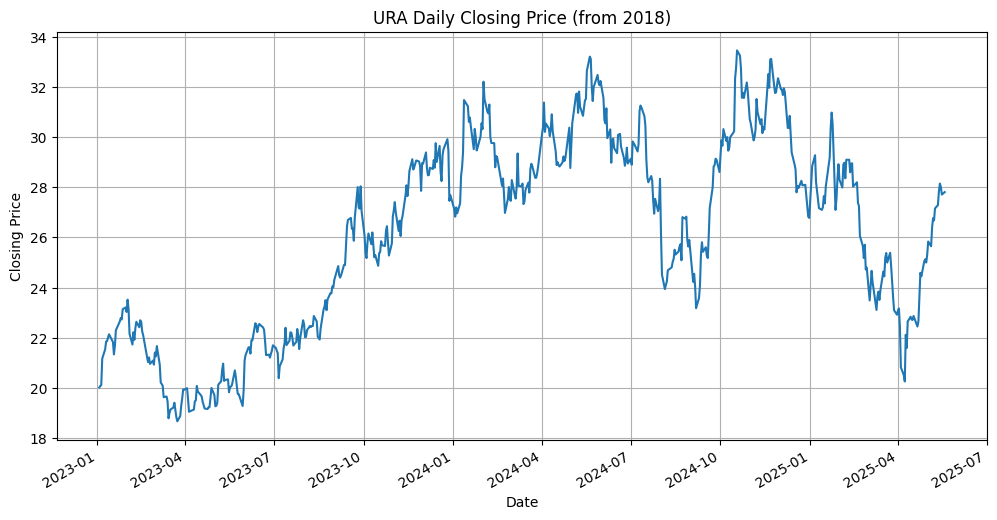

Data for GDX:
            1. open  2. high  3. low  4. close   5. volume
date                                                      
2025-05-19   47.100    47.40  46.650     47.34  19577587.0
2025-05-16   45.410    46.35  45.245     46.33  17271971.0
2025-05-15   46.050    46.60  45.605     46.49  23456736.0
2025-05-14   45.505    45.66  45.100     45.55  26797018.0
2025-05-13   46.720    46.75  46.160     46.54  22356323.0


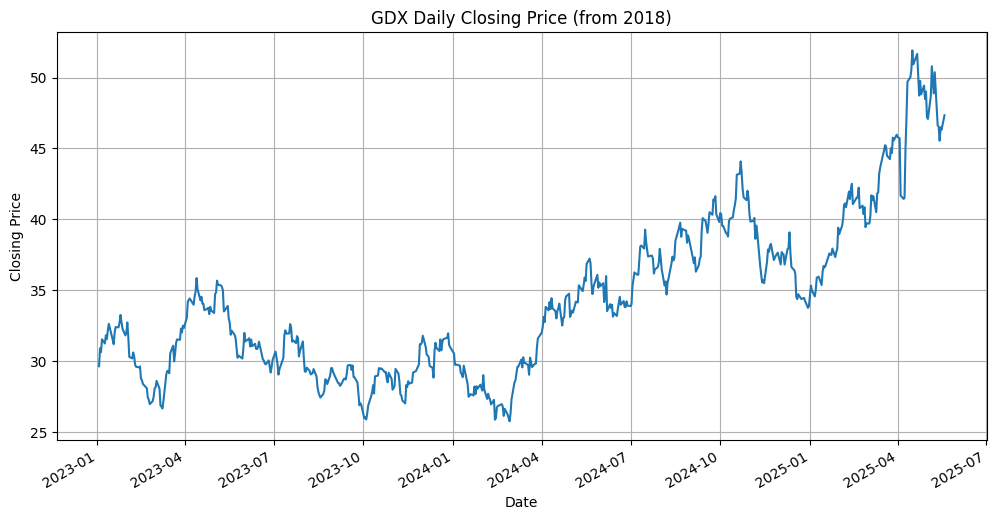

Data for GDXJ:
            1. open  2. high  3. low  4. close  5. volume
date                                                     
2025-05-19   59.640    60.27   59.26     60.24  5147251.0
2025-05-16   57.630    58.71   57.46     58.71  5202932.0
2025-05-15   58.600    59.24   57.84     59.21  5814525.0
2025-05-14   57.975    58.26   57.40     57.88  7900770.0
2025-05-13   59.300    59.72   58.69     59.31  4870081.0


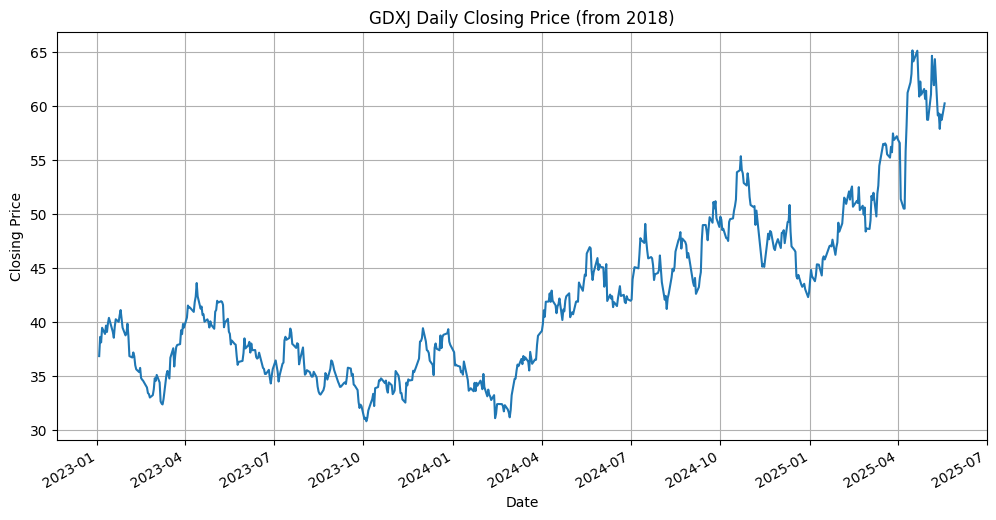

Data for XLE:
            1. open  2. high  3. low  4. close   5. volume
date                                                      
2025-05-19   84.770   84.860  83.745     84.37  12393533.0
2025-05-16   85.800   85.850  84.605     85.48  10862912.0
2025-05-15   84.170   85.660  83.960     85.61  14860766.0
2025-05-14   85.195   85.580  84.920     85.25  10666327.0
2025-05-13   85.000   86.445  84.660     85.77  14515784.0


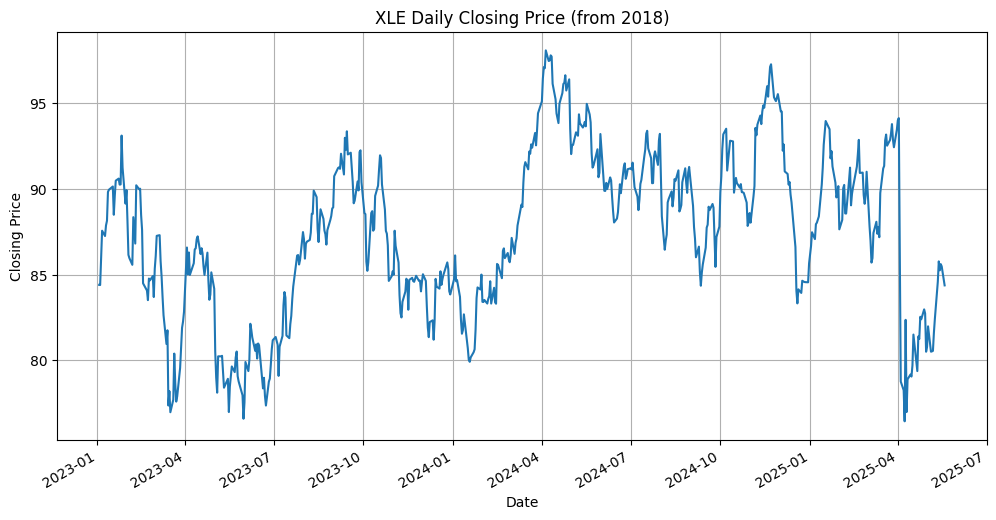

Data for ICLN:
            1. open  2. high   3. low  4. close  5. volume
date                                                      
2025-05-19    12.82    12.87  12.7250     12.83  1908367.0
2025-05-16    13.05    13.05  12.8799     12.96  1719319.0
2025-05-15    12.89    13.08  12.8500     13.00  2736296.0
2025-05-14    12.85    12.96  12.8300     12.93  3522216.0
2025-05-13    12.65    12.93  12.6000     12.81  3869482.0


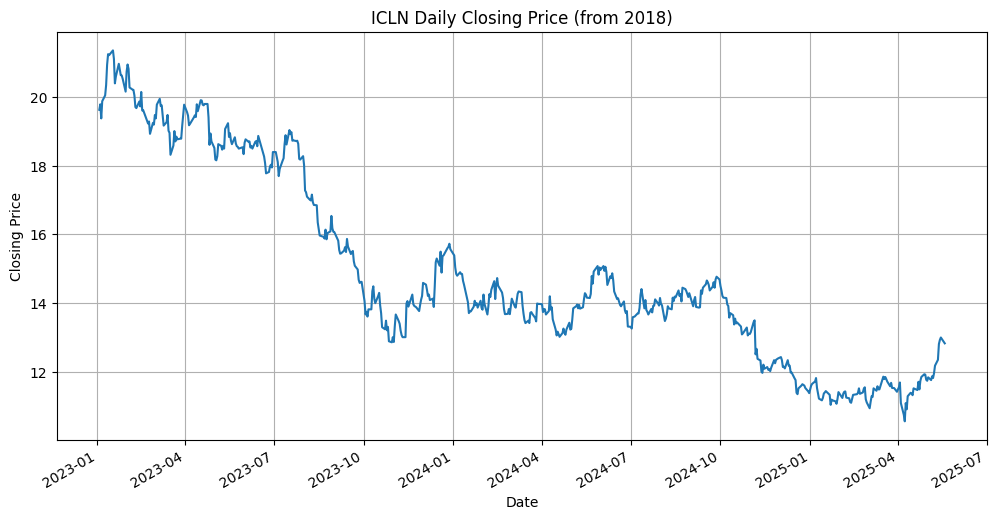

Data for SPY:
            1. open  2. high    3. low  4. close   5. volume
date                                                        
2025-05-19   588.10   595.54  588.1000    594.85  68168509.0
2025-05-16   591.25   594.50  589.2800    594.20  76052101.0
2025-05-15   585.56   590.97  585.0969    590.46  71268145.0
2025-05-14   587.81   588.98  585.5350    587.59  66283531.0
2025-05-13   583.41   589.08  582.8400    586.84  67947225.0


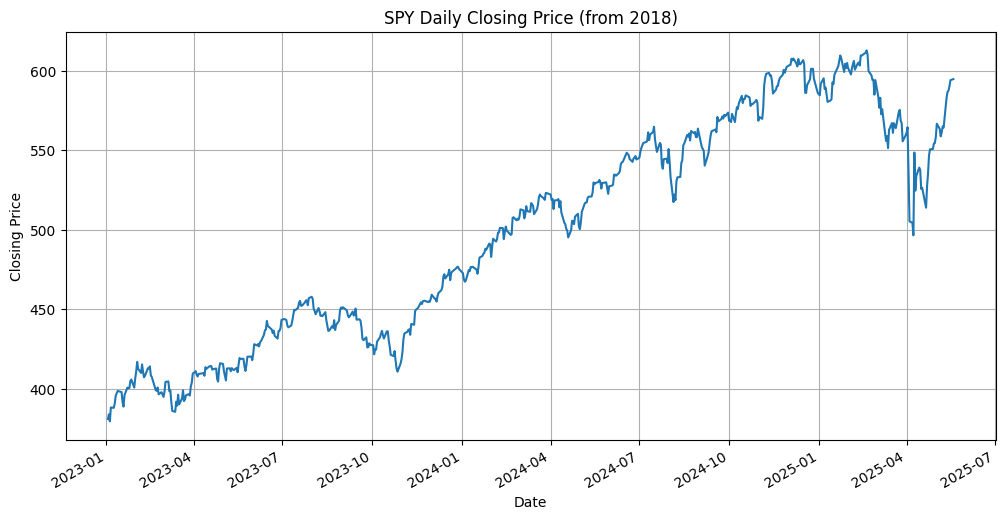

Data for GLD:
            1. open  2. high   3. low  4. close   5. volume
date                                                       
2025-05-19  297.845  298.580  296.482    298.03  11656261.0
2025-05-16  292.620  294.575  291.780    294.24  14173039.0
2025-05-15  294.100  297.900  293.750    297.84  13497735.0
2025-05-14  293.670  294.800  291.960    293.16  14800596.0
2025-05-13  299.020  300.300  297.240    299.46  10233603.0


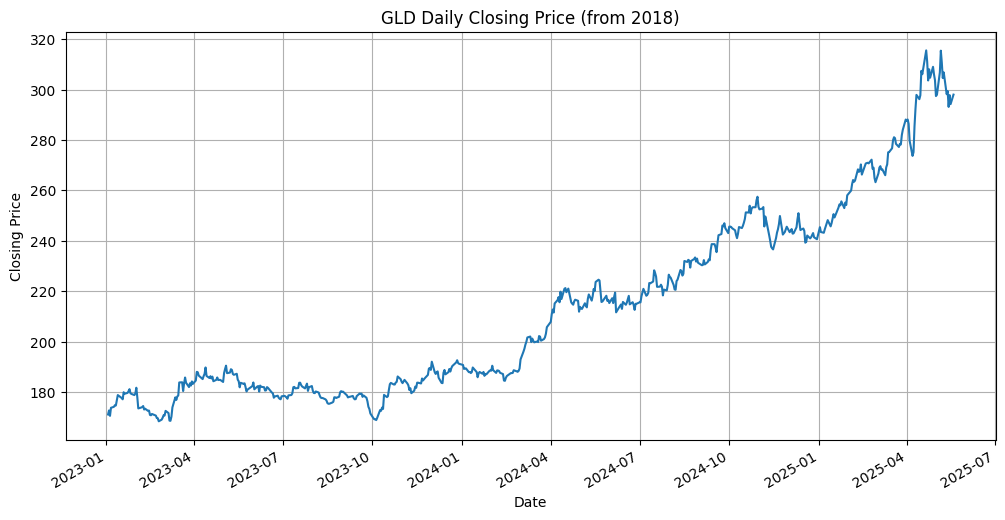

Data for CPER:
            1. open  2. high   3. low  4. close  5. volume
date                                                      
2025-05-19    28.86  29.1992  28.8600     29.09   170475.0
2025-05-16    28.83  28.9100  28.5400     28.61   135681.0
2025-05-15    28.90  29.3250  28.7994     29.27    95659.0
2025-05-14    29.26  29.2600  28.9100     29.00   160079.0
2025-05-13    28.93  29.5500  28.9200     29.41   316931.0


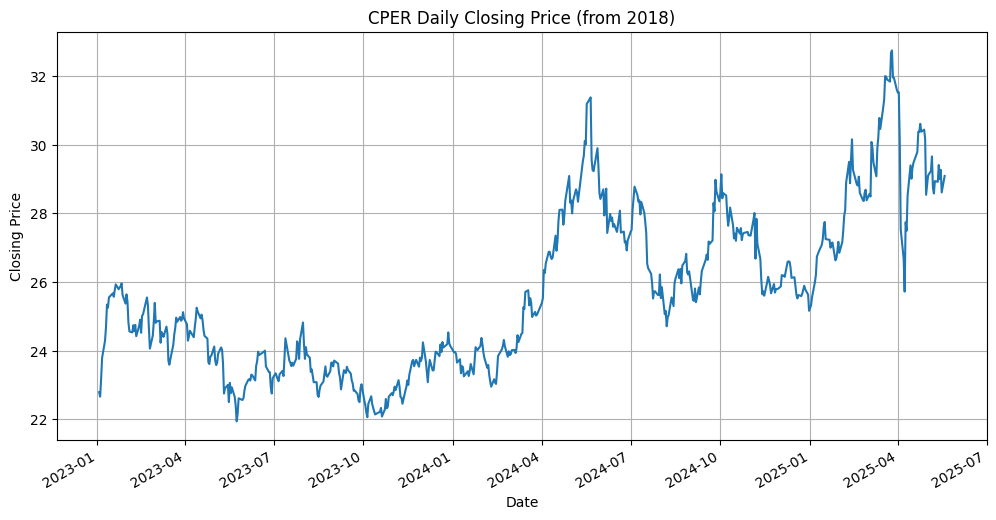

Data for USO:
            1. open  2. high  3. low  4. close  5. volume
date                                                     
2025-05-19    68.11    69.10   67.88     68.51  5136884.0
2025-05-16    67.83    68.54   67.42     68.10  3769410.0
2025-05-15    67.41    67.79   66.87     67.59  5263445.0
2025-05-14    69.28    69.55   68.70     68.73  2802450.0
2025-05-13    68.45    69.88   68.40     69.59  4728018.0


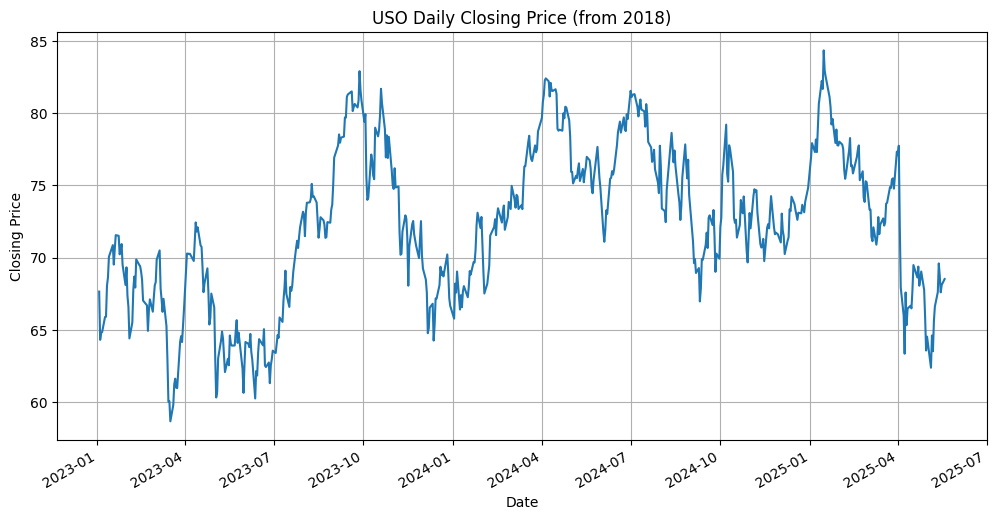

Data for UNG:
            1. open  2. high  3. low  4. close  5. volume
date                                                     
2025-05-19    16.02  16.0900   15.62     15.65  8609611.0
2025-05-16    17.04  17.2685   16.64     16.71  4364129.0
2025-05-15    17.39  17.5100   16.78     16.80  6212183.0
2025-05-14    17.64  17.8400   17.37     17.40  5132737.0
2025-05-13    18.52  18.5400   17.89     18.19  5938706.0


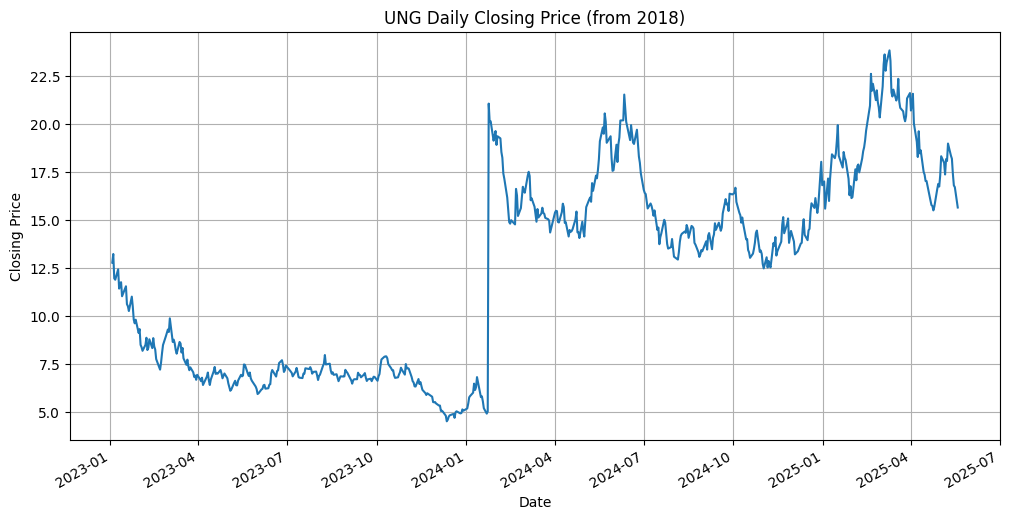

Data for KOL:
Empty DataFrame
Columns: [1. open, 2. high, 3. low, 4. close, 5. volume]
Index: []


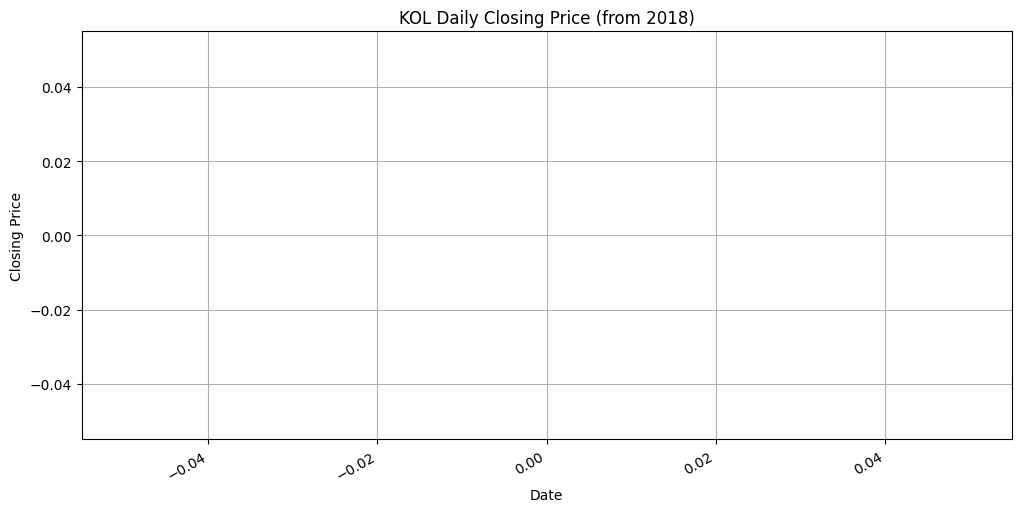

Data for JJN:
            1. open  2. high  3. low  4. close  5. volume
date                                                     
2023-06-14     28.4     28.4    28.4      28.4        0.0
2023-06-13     28.4     28.4    28.4      28.4        0.0
2023-06-12     28.4     28.4    28.4      28.4        0.0
2023-06-09     28.4     28.4    28.4      28.4        0.0
2023-06-08     28.4     28.4    28.4      28.4       83.0


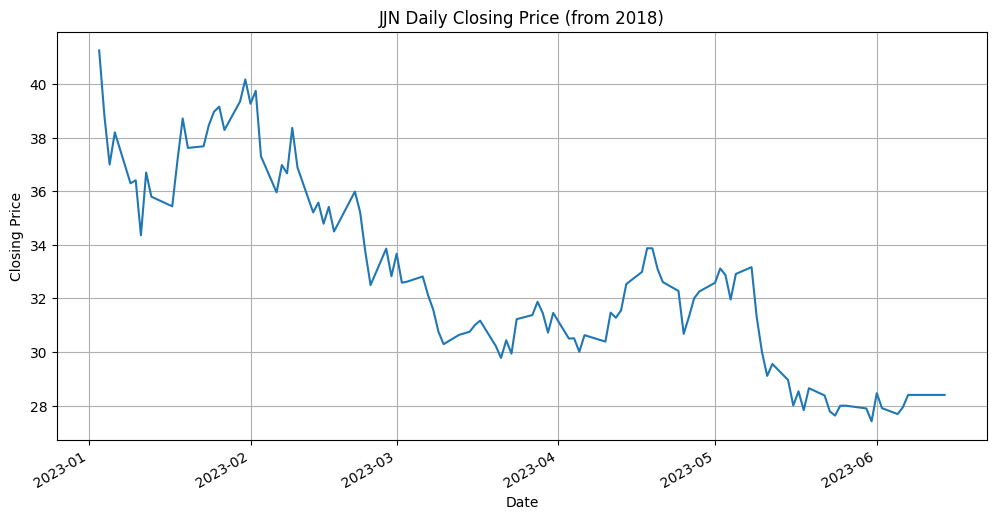

In [4]:

api_key = 'PH8UF085L5T5MFZN'
symbols = ['LIT', 'REMX', 'URA', 'GDX', 'GDXJ', 'XLE', 'ICLN', 'SPY', 'GLD', 'CPER', 'USO', 'UNG', 'KOL', 'JJN']

ts = TimeSeries(key=api_key, output_format='pandas')
all_data = {}
for symbol in symbols:
    data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')
    # Filter data from 2018 onwards
    data.index = pd.to_datetime(data.index)
    data = data[data.index >= '2023-01-01']
    all_data[symbol] = data
    print(f"Data for {symbol}:")
    print(data.head())  # Print the first few rows of the dataset
    # Plot the data
    data['4. close'].plot(figsize=(12, 6), title=f'{symbol} Daily Closing Price (from 2018)')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.grid(True)
    plt.show()

In [11]:
all_data['LIT'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['REMX'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['URA'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['GDX'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['GDXJ'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['XLE'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['ICLN'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['SPY'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['GLD'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['CPER'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['USO'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['UNG'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['KOL'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['JJN'].columns = ['open', 'high', 'low', 'close', 'volume']

ValueError: Length mismatch: Expected axis has 71 elements, new values have 5 elements

[!] VWAP volume series is not datetime ordered. Results may not be as expected.
[!] VWAP price series is not datetime ordered. Results may not be as expected.

Data for LIT:
             open     high    low  close    volume  SMA_100  EMA_20  WMA_20  \
date                                                                          
2025-05-19  37.89  38.2600  37.89  38.20  220562.0      NaN     NaN     NaN   
2025-05-16  38.48  38.6000  38.30  38.58  143462.0      NaN     NaN     NaN   
2025-05-15  38.82  38.9662  38.47  38.74  128908.0      NaN     NaN     NaN   
2025-05-14  39.29  39.5500  39.16  39.24  120114.0      NaN     NaN     NaN   
2025-05-13  38.85  39.2800  38.85  39.19  164627.0      NaN     NaN     NaN   

            HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  FISHERT_9_1  \
date                         ...                                         
2025-05-19     NaN      NaN  ...       0        0       1          NaN   
2025-05-16     NaN      NaN  ...       0        0 

/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_4260/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 5522330.58666667  4992013.8632      4722482.1         5367896.1893
  2066072.6         5699680.53866667  5128097.76        5634391.83666667
  3642181.          3461227.66666667  4698872.93283333 14936557.4875
 20468310.6542      8433809.65        3352730.84        5631779.8152
 13495791.73146667  8467223.47333333  4756736.56666667  4989061.38666667
 11617107.68        4024466.77333333  5957352.34166667  5092986.17333333
  5451365.44773333 16653550.95        8437384.26        7810233.
 13713973.2356      8404913.08666667 10489956.655       8231352.2046
 10638690.73333333 13297536.          8305391.20586667 13780473.
  6456091.72        9531452.079       8458885.76        6968186.11
 10922931.48        5414422.86        9970298.          9810175.3465
 14264198.82696667 14360908.

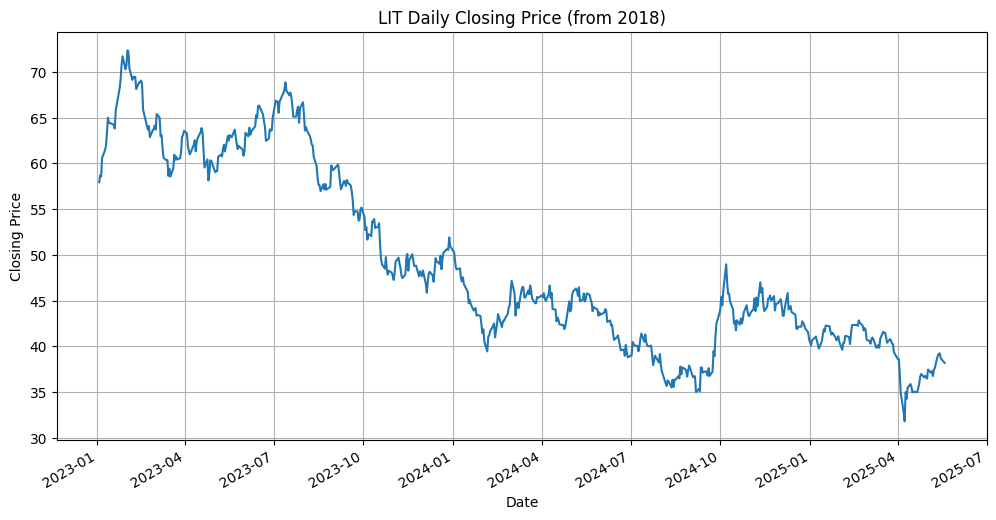

Number of technical indicators successfully added to LIT: 39
[!] VWAP volume series is not datetime ordered. Results may not be as expected.
[!] VWAP price series is not datetime ordered. Results may not be as expected.

Data for REMX:
             open   high      low  close    volume  SMA_100  EMA_20  WMA_20  \
date                                                                          
2025-05-19  38.28  38.28  37.8200  38.15  114099.0      NaN     NaN     NaN   
2025-05-16  39.41  39.41  38.9400  39.31  103116.0      NaN     NaN     NaN   
2025-05-15  39.65  39.86  39.1900  39.67  141722.0      NaN     NaN     NaN   
2025-05-14  40.08  40.29  39.6337  39.77  126862.0      NaN     NaN     NaN   
2025-05-13  39.86  40.10  39.6200  39.93   52374.0      NaN     NaN     NaN   

            HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  FISHERT_9_1  \
date                         ...                                         
2025-05-19     NaN      NaN  ...       0        0       1     

/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_4260/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 4044209.52        5608411.94666667  5061527.3898      1917201.5072
  1641347.07333333  3068579.1509      2910684.46666667  3322615.7356
  4377092.58        3496569.2763      6088323.41333333  8628793.12166667
  5935856.62       12240331.04       15797628.45876666 13522127.9364
  3275212.22        8835137.61        7787145.13333333  2632856.75333333
 10748891.38396667  9835553.175       4017156.6434      4108256.01666667
  4322197.66        5832853.         17145949.33333333  4295946.2
  6595921.76        8856419.5         6541037.28666667  2325348.
 11555808.992       3821609.20166667  1990052.16        3936343.08
  8503529.68666667  3152348.32        7347492.2        21617013.
  1878163.55526667  4754713.6         2765453.01093333  2428090.28
  1734673.85        3843838.6899 

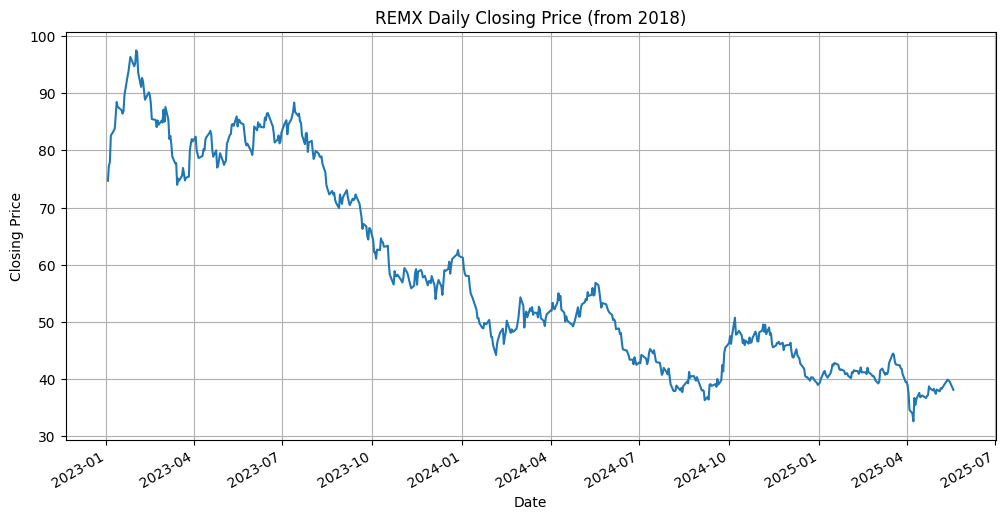

Number of technical indicators successfully added to REMX: 39
[!] VWAP volume series is not datetime ordered. Results may not be as expected.
[!] VWAP price series is not datetime ordered. Results may not be as expected.

Data for URA:
             open    high      low  close     volume  SMA_100  EMA_20  WMA_20  \
date                                                                            
2025-05-19  27.28  27.890  27.2601  27.81  2081668.0      NaN     NaN     NaN   
2025-05-16  28.05  28.160  27.5701  27.71  2220237.0      NaN     NaN     NaN   
2025-05-15  27.92  28.090  27.5701  28.01  2131299.0      NaN     NaN     NaN   
2025-05-14  27.96  28.305  27.8600  28.15  2212220.0      NaN     NaN     NaN   
2025-05-13  27.34  28.000  27.3000  27.84  3082168.0      NaN     NaN     NaN   

            HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  FISHERT_9_1  \
date                         ...                                         
2025-05-19     NaN      NaN  ...       0        

/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_4260/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[6.17522658e+07 5.94420002e+07 6.21744431e+07 8.69899092e+07
 3.54090043e+07 5.70468816e+07 3.20806765e+07 1.25506996e+08
 7.36068599e+07 3.61460179e+07 5.34518818e+07 9.26654959e+07
 4.04665521e+07 6.39961761e+07 5.70958017e+07 6.44666131e+07
 7.14404232e+07 7.89277195e+07 1.00391271e+08 7.41856005e+07
 5.88236471e+07 9.88408820e+07 7.20795498e+07 1.92042833e+08
 7.82544412e+07 7.89689413e+07 1.16007858e+08 6.16019142e+07
 6.76003507e+07 5.05248199e+07 6.46532571e+07 4.08919199e+07
 5.60064722e+07 5.10312541e+07 5.47171096e+07 7.36063107e+07
 5.25496390e+07 1.99417680e+08 1.23536615e+08 5.79355104e+07
 4.96495787e+07 7.25033509e+07 8.38948879e+07 8.09209114e+07
 8.09117142e+07 9.38351233e+07 4.60337890e+07 4.47182114e+07
 7.18154295e+07 8.42101788e+07 8.54263260e+07 8.22187082e

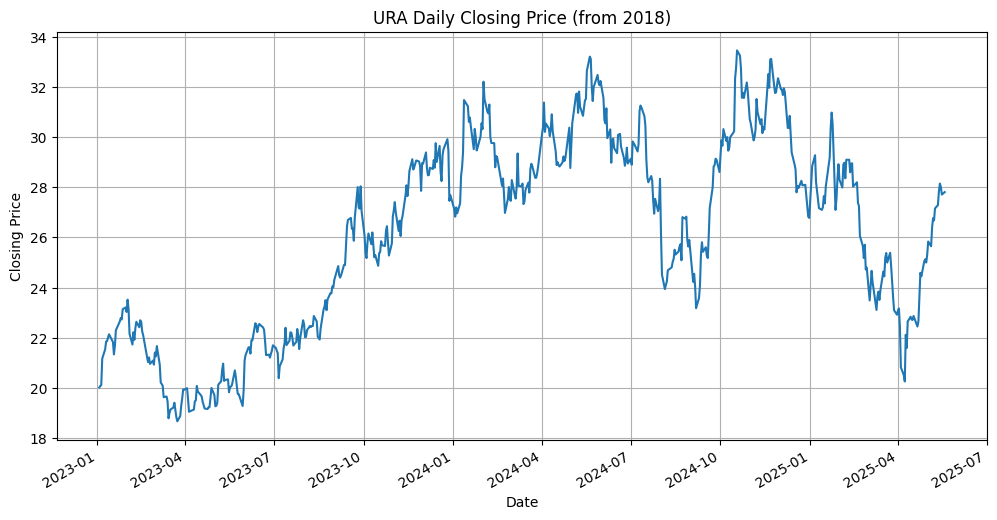

Number of technical indicators successfully added to URA: 39
[!] VWAP volume series is not datetime ordered. Results may not be as expected.
[!] VWAP price series is not datetime ordered. Results may not be as expected.

Data for GDX:
              open   high     low  close      volume  SMA_100  EMA_20  WMA_20  \
date                                                                            
2025-05-19  47.100  47.40  46.650  47.34  19577587.0      NaN     NaN     NaN   
2025-05-16  45.410  46.35  45.245  46.33  17271971.0      NaN     NaN     NaN   
2025-05-15  46.050  46.60  45.605  46.49  23456736.0      NaN     NaN     NaN   
2025-05-14  45.505  45.66  45.100  45.55  26797018.0      NaN     NaN     NaN   
2025-05-13  46.720  46.75  46.160  46.54  22356323.0      NaN     NaN     NaN   

            HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  FISHERT_9_1  \
date                         ...                                         
2025-05-19     NaN      NaN  ...       0        0

/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_4260/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.08444400e+09 1.03919641e+09 2.01043545e+09 1.03438514e+09
 1.11680533e+09 1.56797912e+09 7.70639393e+08 6.38421822e+08
 7.42142548e+08 1.12781321e+09 1.92879635e+09 1.88581074e+09
 1.90484778e+09 2.03188339e+09 2.54956456e+09 1.38420980e+09
 7.25690029e+08 7.86605336e+08 9.91281110e+08 7.29753814e+08
 4.53309975e+08 7.71140261e+08 9.81573869e+08 7.13096358e+08
 8.74219044e+08 5.22501336e+08 5.18620974e+08 1.30860300e+09
 6.88152070e+08 8.85967843e+08 1.09448423e+09 7.27929003e+08
 1.07113773e+09 1.12187702e+09 5.21436833e+08 4.72472948e+08
 4.96084190e+08 7.17815111e+08 4.80513918e+08 3.61618953e+08
 3.01349620e+08 9.68924704e+08 1.14679018e+09 5.33612114e+08
 4.17292029e+08 7.19168818e+08 8.60564316e+08 8.18879040e+08
 1.15891512e+09 3.72171477e+08 3.07371225e+08 2.73937332e

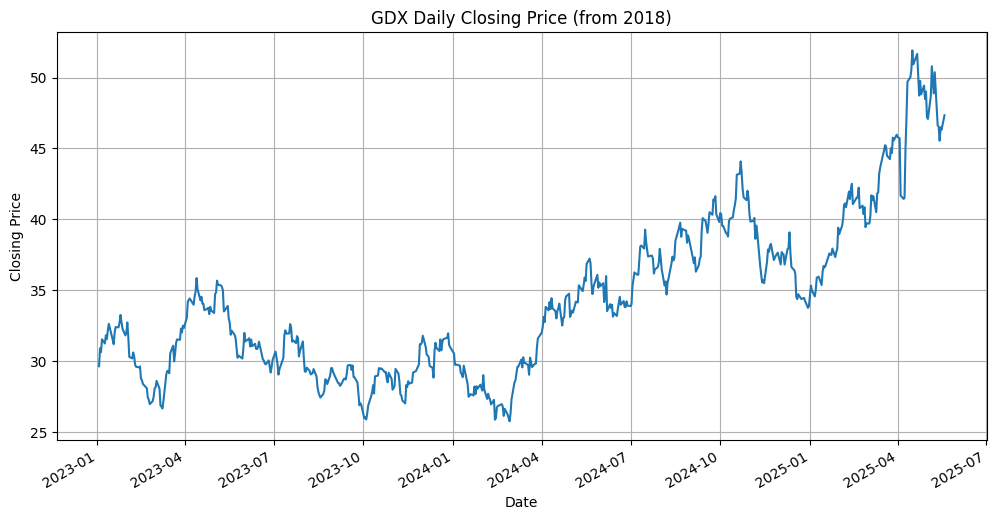

Number of technical indicators successfully added to GDX: 39
[!] VWAP volume series is not datetime ordered. Results may not be as expected.
[!] VWAP price series is not datetime ordered. Results may not be as expected.

Data for GDXJ:
              open   high    low  close     volume  SMA_100  EMA_20  WMA_20  \
date                                                                          
2025-05-19  59.640  60.27  59.26  60.24  5147251.0      NaN     NaN     NaN   
2025-05-16  57.630  58.71  57.46  58.71  5202932.0      NaN     NaN     NaN   
2025-05-15  58.600  59.24  57.84  59.21  5814525.0      NaN     NaN     NaN   
2025-05-14  57.975  58.26  57.40  57.88  7900770.0      NaN     NaN     NaN   
2025-05-13  59.300  59.72  58.69  59.31  4870081.0      NaN     NaN     NaN   

            HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  FISHERT_9_1  \
date                         ...                                         
2025-05-19     NaN      NaN  ...       0        0       1     

/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_4260/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[3.41680871e+08 2.88503598e+08 7.32835548e+08 3.10652602e+08
 3.23732562e+08 6.00146828e+08 2.02738765e+08 1.78307388e+08
 3.00943118e+08 2.24687203e+08 5.63588857e+08 4.53156060e+08
 5.39133378e+08 7.11893754e+08 3.70200793e+08 2.30695835e+08
 1.78743389e+08 2.43272096e+08 1.67951917e+08 1.48640083e+08
 2.10990708e+08 2.69047381e+08 2.80358531e+08 2.74810160e+08
 1.47612074e+08 1.35394253e+08 3.12427836e+08 2.57723661e+08
 2.72598345e+08 3.15299872e+08 2.41944578e+08 2.87495295e+08
 2.65519573e+08 2.77258111e+08 2.30219450e+08 1.41499733e+08
 1.11089106e+08 1.97016339e+08 1.37116219e+08 2.45410744e+08
 1.31684083e+08 1.40831815e+08 2.37496436e+08 3.01420804e+08
 1.54560564e+08 1.73643596e+08 2.30613816e+08 3.35893340e+08
 2.29524409e+08 1.40050003e+08 1.11569264e+08 3.76996981e

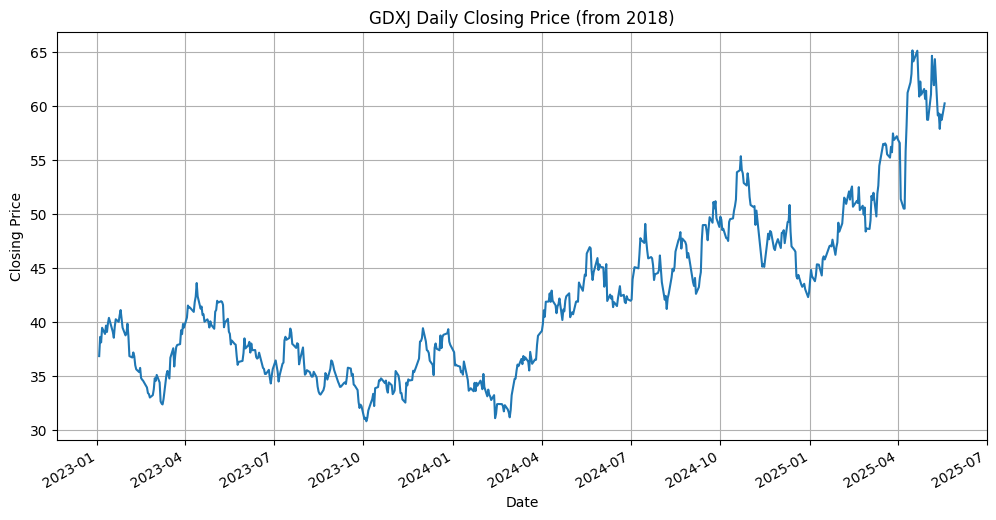

Number of technical indicators successfully added to GDXJ: 39
[!] VWAP volume series is not datetime ordered. Results may not be as expected.
[!] VWAP price series is not datetime ordered. Results may not be as expected.

Data for XLE:
              open    high     low  close      volume  SMA_100  EMA_20  \
date                                                                     
2025-05-19  84.770  84.860  83.745  84.37  12393533.0      NaN     NaN   
2025-05-16  85.800  85.850  84.605  85.48  10862912.0      NaN     NaN   
2025-05-15  84.170  85.660  83.960  85.61  14860766.0      NaN     NaN   
2025-05-14  85.195  85.580  84.920  85.25  10666327.0      NaN     NaN   
2025-05-13  85.000  86.445  84.660  85.77  14515784.0      NaN     NaN   

            WMA_20  HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
date                                 ...                            
2025-05-19     NaN     NaN      NaN  ...       0        0       1   
2025-05-16     NaN     NaN      NaN  .

/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_4260/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[9.26733128e+08 9.09304377e+08 1.24291400e+09 9.26755444e+08
 1.30656913e+09 8.18999796e+08 6.80356519e+08 8.72135854e+08
 1.95280204e+09 4.75968242e+09 4.45773917e+09 4.06550765e+09
 3.32629711e+09 1.59229924e+09 8.91063776e+08 1.20248638e+09
 1.53978586e+09 1.41573277e+09 1.76467069e+09 2.20259273e+09
 2.20037350e+09 1.20190310e+09 1.19692459e+09 1.19579072e+09
 1.43014878e+09 1.30949483e+09 1.73964003e+09 1.19528723e+09
 1.84185844e+09 9.80066490e+08 1.96852112e+09 1.76170541e+09
 1.67996185e+09 1.44636829e+09 1.33737364e+09 1.35328423e+09
 1.65527590e+09 2.30462461e+09 1.11993760e+09 1.10044753e+09
 8.62911416e+08 1.49757994e+09 2.09776530e+09 1.66696720e+09
 1.38279761e+09 1.09917053e+09 9.98533691e+08 9.77314696e+08
 1.04588130e+09 1.05583171e+09 1.07870743e+09 1.19797048e

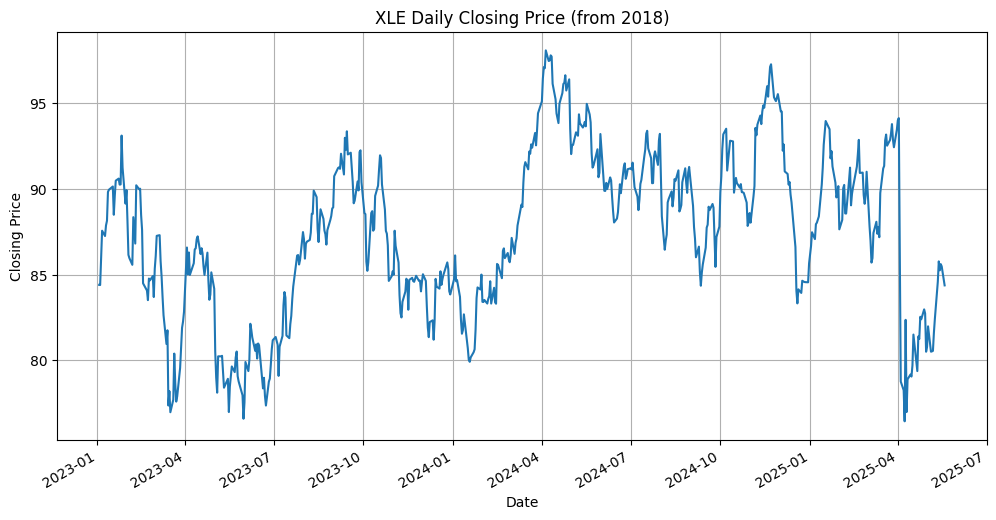

Number of technical indicators successfully added to XLE: 39
[!] VWAP volume series is not datetime ordered. Results may not be as expected.
[!] VWAP price series is not datetime ordered. Results may not be as expected.

Data for ICLN:
             open   high      low  close     volume  SMA_100  EMA_20  WMA_20  \
date                                                                           
2025-05-19  12.82  12.87  12.7250  12.83  1908367.0      NaN     NaN     NaN   
2025-05-16  13.05  13.05  12.8799  12.96  1719319.0      NaN     NaN     NaN   
2025-05-15  12.89  13.08  12.8500  13.00  2736296.0      NaN     NaN     NaN   
2025-05-14  12.85  12.96  12.8300  12.93  3522216.0      NaN     NaN     NaN   
2025-05-13  12.65  12.93  12.6000  12.81  3869482.0      NaN     NaN     NaN   

            HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  FISHERT_9_1  \
date                         ...                                         
2025-05-19     NaN      NaN  ...       0        0      

/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_4260/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[2.22880480e+07 3.55080011e+07 2.39064860e+07 1.78195880e+07
 1.04994021e+07 1.98724428e+07 1.82738893e+07 1.88420242e+07
 5.86193410e+07 3.81074523e+07 4.59686315e+07 3.01587361e+07
 1.34842557e+07 1.87745872e+07 1.79232433e+07 2.59620374e+07
 2.11891623e+07 1.46515243e+07 1.50909273e+07 2.18699157e+07
 2.49446583e+07 1.87938872e+07 2.13793774e+07 2.54102793e+07
 2.62216240e+07 2.70073727e+07 1.97361843e+07 3.01135430e+07
 1.71856540e+07 2.52999143e+07 3.72530024e+07 3.43028802e+07
 4.38258434e+07 2.82533439e+07 3.57518727e+07 2.45272240e+07
 5.65742149e+07 4.12038304e+07 2.22397267e+07 3.52275970e+07
 2.64378813e+07 2.04086142e+07 1.94963636e+07 6.34117205e+07
 4.54074562e+07 4.13424051e+07 3.96056982e+07 5.05988886e+07
 4.05333630e+07 3.61973342e+07 6.16744798e+07 4.73942557e

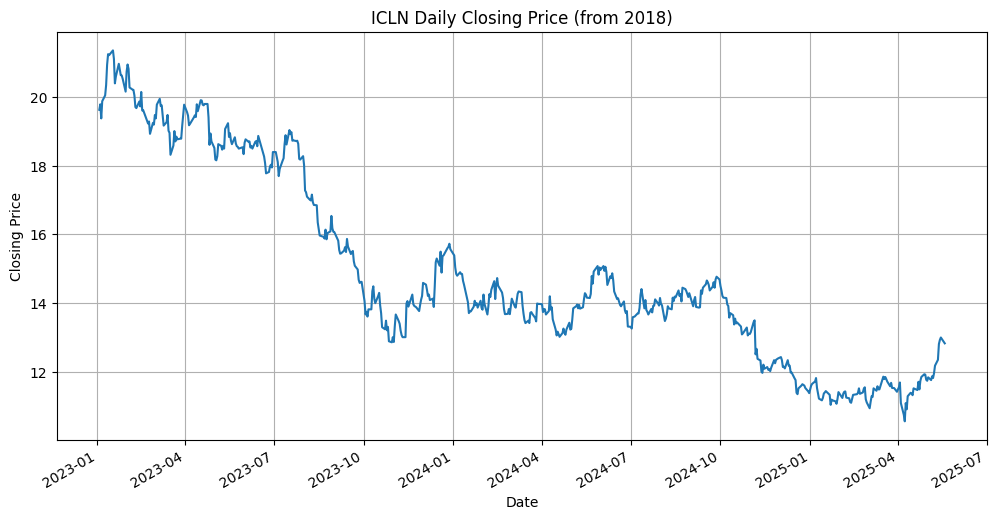

Number of technical indicators successfully added to ICLN: 39
[!] VWAP volume series is not datetime ordered. Results may not be as expected.
[!] VWAP price series is not datetime ordered. Results may not be as expected.

Data for SPY:
              open    high       low   close      volume  SMA_100  EMA_20  \
date                                                                        
2025-05-19  588.10  595.54  588.1000  594.85  68168509.0      NaN     NaN   
2025-05-16  591.25  594.50  589.2800  594.20  76052101.0      NaN     NaN   
2025-05-15  585.56  590.97  585.0969  590.46  71268145.0      NaN     NaN   
2025-05-14  587.81  588.98  585.5350  587.59  66283531.0      NaN     NaN   
2025-05-13  583.41  589.08  582.8400  586.84  67947225.0      NaN     NaN   

            WMA_20  HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
date                                 ...                            
2025-05-19     NaN     NaN      NaN  ...       0        0       1   
2025-05-16     Na

/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_4260/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[3.68438349e+10 2.18019971e+10 3.43562601e+10 2.64088129e+10
 4.21033917e+10 4.40754013e+10 3.06775859e+10 1.28213059e+11
 1.11613405e+11 6.80899725e+10 4.27391774e+10 4.00593633e+10
 2.39341137e+10 2.98072062e+10 2.20617074e+10 3.56482144e+10
 3.77086244e+10 2.77586961e+10 3.88689346e+10 5.45521205e+10
 4.65023784e+10 4.60012486e+10 4.13379127e+10 4.35845273e+10
 5.23986616e+10 2.57904271e+10 3.03870242e+10 4.61595599e+10
 2.22867801e+10 1.89758817e+10 1.81703012e+10 2.16465587e+10
 4.02880143e+10 2.67657445e+10 2.10575324e+10 4.25225247e+10
 2.78350924e+10 3.56955147e+10 2.84274369e+10 3.34925685e+10
 3.32752872e+10 3.86253549e+10 2.48295503e+10 6.41761611e+10
 3.36936351e+10 2.65051970e+10 1.90926282e+10 1.74111538e+10
 2.10381176e+10 1.89938204e+10 1.91578578e+10 2.73735332e

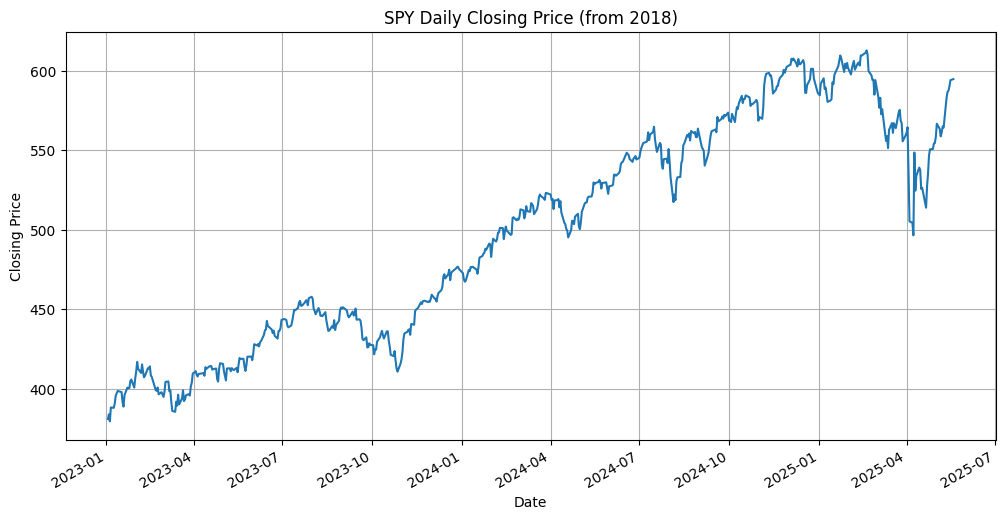

Number of technical indicators successfully added to SPY: 39
[!] VWAP volume series is not datetime ordered. Results may not be as expected.
[!] VWAP price series is not datetime ordered. Results may not be as expected.

Data for GLD:
               open     high      low   close      volume  SMA_100  EMA_20  \
date                                                                         
2025-05-19  297.845  298.580  296.482  298.03  11656261.0      NaN     NaN   
2025-05-16  292.620  294.575  291.780  294.24  14173039.0      NaN     NaN   
2025-05-15  294.100  297.900  293.750  297.84  13497735.0      NaN     NaN   
2025-05-14  293.670  294.800  291.960  293.16  14800596.0      NaN     NaN   
2025-05-13  299.020  300.300  297.240  299.46  10233603.0      NaN     NaN   

            WMA_20  HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
date                                 ...                            
2025-05-19     NaN     NaN      NaN  ...       0        0       1   
2025-05-16 

/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_4260/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[4.00203344e+09 3.05984730e+09 2.12329929e+09 2.46287649e+09
 3.59572232e+09 2.53643683e+09 2.09448324e+09 2.87874236e+09
 3.33040022e+09 1.10320106e+10 6.42367885e+09 6.36730310e+09
 6.28198474e+09 6.03749936e+09 5.86970045e+09 3.19156903e+09
 1.41965092e+09 2.60358120e+09 1.64383142e+09 2.47506443e+09
 2.80381192e+09 1.88236253e+09 2.48754920e+09 1.95184727e+09
 2.71061869e+09 1.45986428e+09 1.99371990e+09 2.25083257e+09
 1.91773467e+09 3.55227614e+09 3.35631388e+09 1.35845446e+09
 1.88018982e+09 1.32584629e+09 2.31595729e+09 3.07357386e+09
 1.18909691e+09 1.52932767e+09 1.14176065e+09 1.13011070e+09
 2.30644340e+09 1.92858497e+09 1.07839406e+09 8.10638850e+08
 2.51165014e+09 2.76282073e+09 1.16853286e+09 1.12814296e+09
 6.62681157e+08 2.60585540e+09 1.87096386e+09 1.95855631e

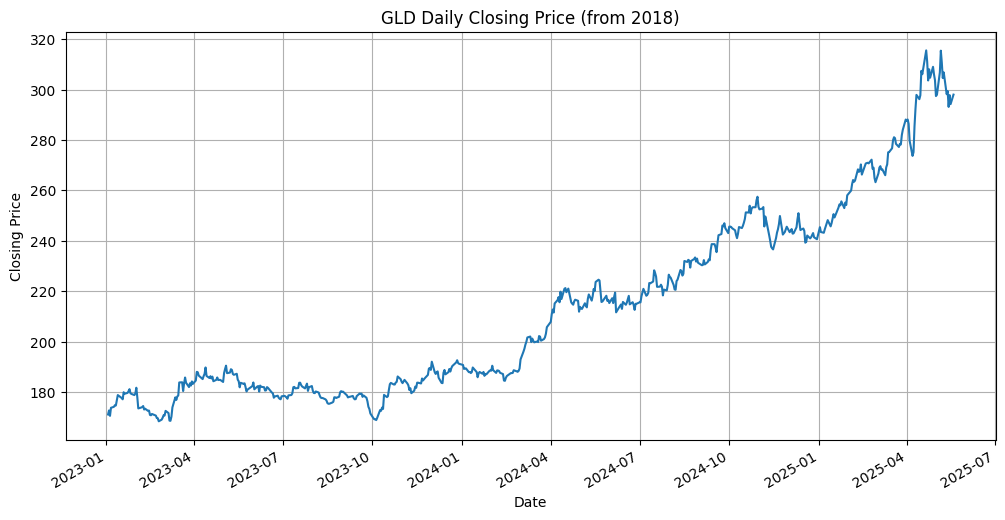

Number of technical indicators successfully added to GLD: 39
[!] VWAP volume series is not datetime ordered. Results may not be as expected.
[!] VWAP price series is not datetime ordered. Results may not be as expected.

Data for CPER:
             open     high      low  close    volume  SMA_100  EMA_20  WMA_20  \
date                                                                            
2025-05-19  28.86  29.1992  28.8600  29.09  170475.0      NaN     NaN     NaN   
2025-05-16  28.83  28.9100  28.5400  28.61  135681.0      NaN     NaN     NaN   
2025-05-15  28.90  29.3250  28.7994  29.27   95659.0      NaN     NaN     NaN   
2025-05-14  29.26  29.2600  28.9100  29.00  160079.0      NaN     NaN     NaN   
2025-05-13  28.93  29.5500  28.9200  29.41  316931.0      NaN     NaN     NaN   

            HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  FISHERT_9_1  \
date                         ...                                         
2025-05-19     NaN      NaN  ...       0        

/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_4260/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 2786686.96986667  9283965.42666667  1146807.57333333  7159431.73333333
  2420698.907       2544427.86666667  2026230.15        1909283.8
  6035458.1045     16240641.96       14416812.16053333 18418385.03586667
  4271858.46953333  6845750.5856     10789396.27666667  8756991.86666667
  9301251.48333333  3137559.9         6075973.66666667  3688009.096
  1987604.06666667  1941246.09566667  2233585.66666667  1967873.06666667
  5905891.29        5378587.9875      4725193.6         1268354.7
  5548670.08        2952089.42        7090239.33333333  4566569.159
  1600964.81666667   850485.0463       985055.3424      1908590.63153333
  1934474.91        1252508.56363333  2102320.92156667   791611.48543333
  1182678.58316667   963614.19466667  3700014.06         530849.9288
  1477396.3766

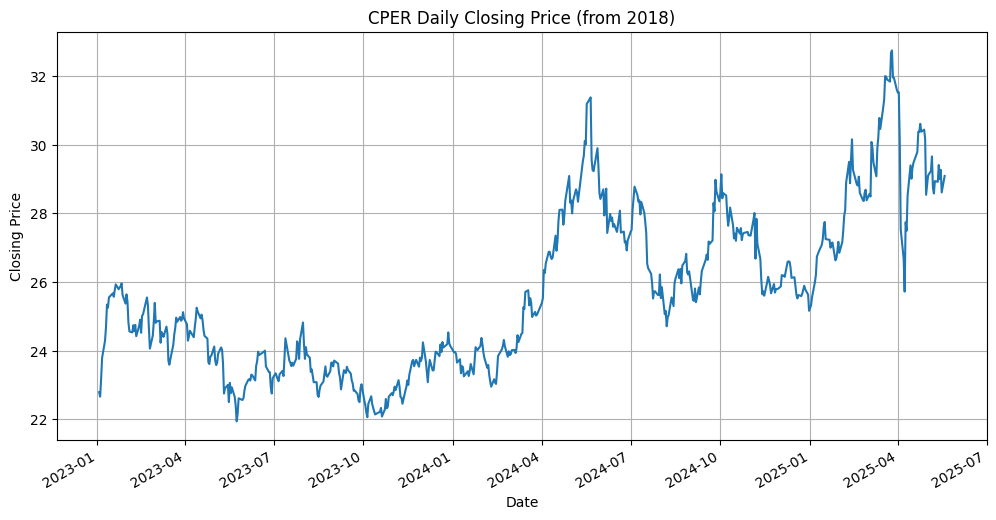

Number of technical indicators successfully added to CPER: 39
[!] VWAP volume series is not datetime ordered. Results may not be as expected.
[!] VWAP price series is not datetime ordered. Results may not be as expected.

Data for USO:
             open   high    low  close     volume  SMA_100  EMA_20  WMA_20  \
date                                                                         
2025-05-19  68.11  69.10  67.88  68.51  5136884.0      NaN     NaN     NaN   
2025-05-16  67.83  68.54  67.42  68.10  3769410.0      NaN     NaN     NaN   
2025-05-15  67.41  67.79  66.87  67.59  5263445.0      NaN     NaN     NaN   
2025-05-14  69.28  69.55  68.70  68.73  2802450.0      NaN     NaN     NaN   
2025-05-13  68.45  69.88  68.40  69.59  4728018.0      NaN     NaN     NaN   

            HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  FISHERT_9_1  \
date                         ...                                         
2025-05-19     NaN      NaN  ...       0        0       1          Na

/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_4260/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.93350367e+08 3.27604367e+08 3.72455037e+08 4.53472376e+08
 6.85600074e+08 3.07653536e+08 2.19792429e+08 2.24962650e+08
 6.08892831e+08 3.12468671e+08 3.30678757e+08 2.09126068e+08
 1.00195374e+09 5.24922098e+08 6.27041123e+08 4.52952069e+08
 2.17452786e+08 1.19805965e+08 1.86728050e+08 1.98732420e+08
 2.09118494e+08 1.73453720e+08 3.03725999e+08 1.47986452e+08
 2.95469842e+08 1.76327917e+08 1.98812158e+08 1.77787950e+08
 2.22312315e+08 1.26824416e+08 1.44454872e+08 3.77214643e+08
 1.78641025e+08 1.51488829e+08 4.73379315e+08 3.26954455e+08
 1.74595564e+08 1.25062462e+08 1.53074685e+08 3.03510990e+08
 2.25666010e+08 1.95199703e+08 1.89744540e+08 2.98826424e+08
 4.09619196e+08 4.15670374e+08 3.05574918e+08 1.46081542e+08
 7.45777968e+07 1.16499299e+08 1.53495030e+08 1.71642423e

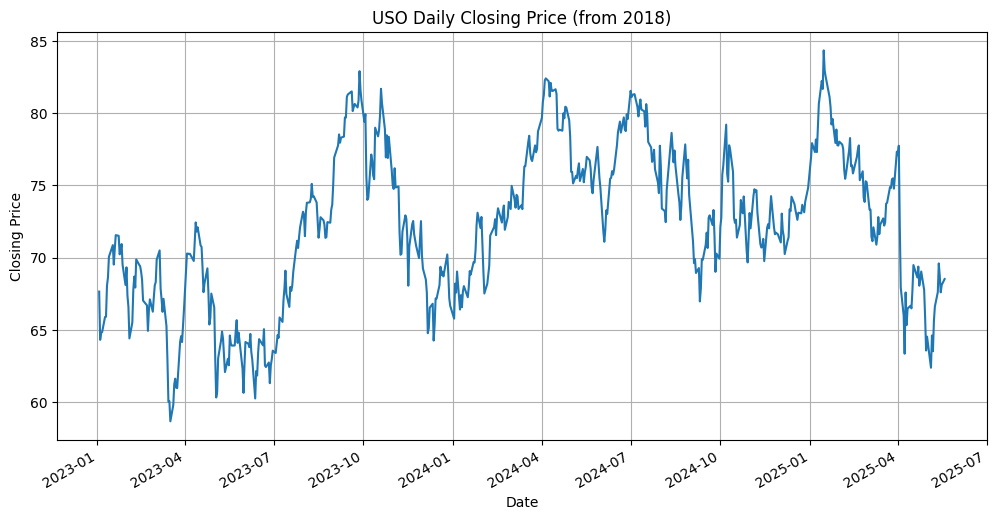

Number of technical indicators successfully added to USO: 39
[!] VWAP volume series is not datetime ordered. Results may not be as expected.
[!] VWAP price series is not datetime ordered. Results may not be as expected.

Data for UNG:
             open     high    low  close     volume  SMA_100  EMA_20  WMA_20  \
date                                                                           
2025-05-19  16.02  16.0900  15.62  15.65  8609611.0      NaN     NaN     NaN   
2025-05-16  17.04  17.2685  16.64  16.71  4364129.0      NaN     NaN     NaN   
2025-05-15  17.39  17.5100  16.78  16.80  6212183.0      NaN     NaN     NaN   
2025-05-14  17.64  17.8400  17.37  17.40  5132737.0      NaN     NaN     NaN   
2025-05-13  18.52  18.5400  17.89  18.19  5938706.0      NaN     NaN     NaN   

            HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  FISHERT_9_1  \
date                         ...                                         
2025-05-19     NaN      NaN  ...       0        0       

/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_4260/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[7.36352213e+07 1.05793476e+08 9.00110979e+07 1.08124041e+08
 8.95486655e+07 1.12573640e+08 9.60155623e+07 1.22898420e+08
 1.10064425e+08 1.31562030e+08 1.29154171e+08 9.93049164e+07
 8.68647636e+07 8.32911610e+07 1.07216583e+08 1.51227965e+08
 1.71212255e+08 2.62338892e+08 1.69012949e+08 1.27814275e+08
 1.05005809e+08 1.48350343e+08 1.19209541e+08 1.14594105e+08
 1.10965645e+08 1.46753446e+08 1.27992128e+08 8.40860602e+07
 1.22561380e+08 1.67751337e+08 2.12855575e+08 1.90482996e+08
 2.96736852e+08 1.42377207e+08 1.16186786e+08 1.16163064e+08
 2.74328617e+08 5.67948139e+08 1.25720337e+08 1.63380626e+08
 1.25242836e+08 9.37428341e+07 1.34289138e+08 1.14117042e+08
 1.85703801e+08 1.71442279e+08 3.21005051e+08 2.73839606e+08
 2.81703833e+08 2.41881552e+08 5.53921475e+08 6.62930432e

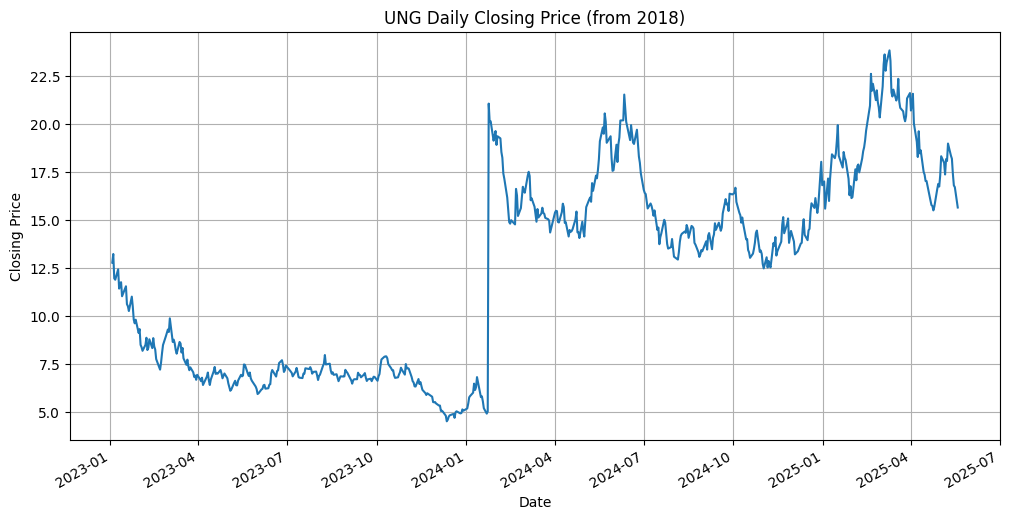

/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_4260/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 135297.4          85320.0432      106149.92313333   70393.03706667
  100719.9522      200544.1812      126873.5         841739.14173333
   95355.4959      238385.88396667   65634.17666667  164001.78
  232211.18013333   38385.80956667  308967.6128      224426.22826667
  423303.79923333  228290.909       229758.6         181174.8762
  221529.5824      210999.13333333   77281.4655      301808.69613333
   37955.36        186189.05333333  220319.565        64713.69666667
  557246.3336     2801926.8459       91041.0031      150161.6371
  163982.3976      288719.72306667  257419.4673      440071.9144
  200787.0124      368634.468       219595.5468      113069.64983333
  252999.70666667   56913.13873333  398630.8         536205.68026667
  393695.4972     6882458.56106667  370209.2772 

Number of technical indicators successfully added to UNG: 39
[!] VWAP volume series is not datetime ordered. Results may not be as expected.
[!] VWAP price series is not datetime ordered. Results may not be as expected.

Data for JJN:
            open  high   low  close  volume  SMA_100  EMA_20  WMA_20  HMA_20  \
date                                                                           
2023-06-14  28.4  28.4  28.4   28.4     0.0      NaN     NaN     NaN     NaN   
2023-06-13  28.4  28.4  28.4   28.4     0.0      NaN     NaN     NaN     NaN   
2023-06-12  28.4  28.4  28.4   28.4     0.0      NaN     NaN     NaN     NaN   
2023-06-09  28.4  28.4  28.4   28.4     0.0      NaN     NaN     NaN     NaN   
2023-06-08  28.4  28.4  28.4   28.4    83.0      NaN     NaN     NaN     NaN   

            VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  FISHERT_9_1  FISHERTs_9_1  \
date                 ...                                                       
2023-06-14      NaN  ...       0        0   

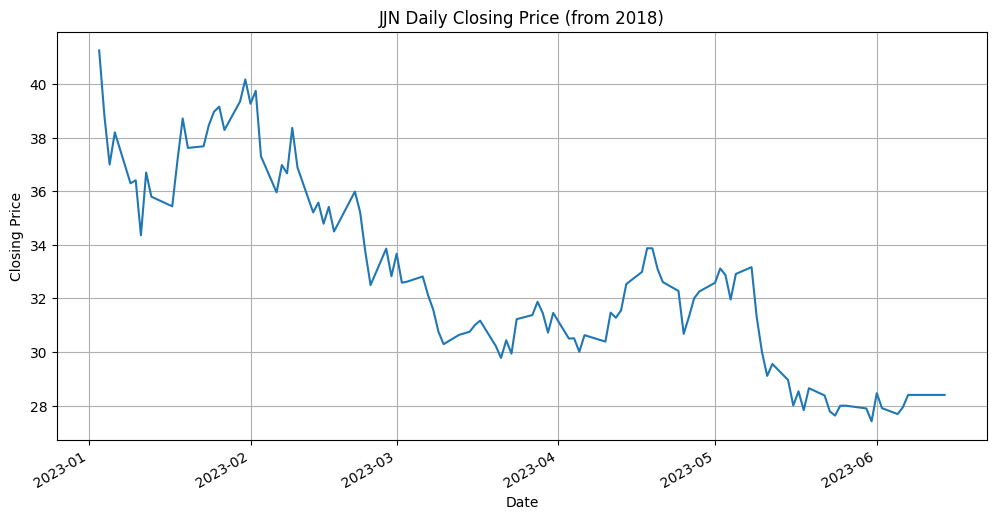

Number of technical indicators successfully added to JJN: 39


In [15]:
# Apply technical indicators to each dataframe
for symbol, data in all_data.items():
    # Skip completely if DataFrame is empty or too small
    if len(data) <= 1:
        print(f"Warning: Ticker {symbol} has insufficient data (length={len(data)}). Skipping technical indicators.")
        continue

    # Rename columns if needed (ensure they match pandas_ta requirements)
    if data.columns[0] != 'open':  # Only rename if not already renamed
        data.columns = ['open', 'high', 'low', 'close', 'volume']

    indicator_count = 0  # Track the number of successfully added indicators

    # Trend Indicators
    try:
        data.ta.sma(length=100, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding SMA to {symbol}: {e}")

    try:
        data.ta.ema(length=20, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding EMA to {symbol}: {e}")

    try:
        data.ta.wma(length=20, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding WMA to {symbol}: {e}")

    try:
        data.ta.hma(length=20, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding HMA to {symbol}: {e}")

    try:
        data.ta.vwma(length=20, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding VWMA to {symbol}: {e}")

    try:
        data.ta.macd(fast=12, slow=26, signal=9, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding MACD to {symbol}: {e}")

    try:
        data.ta.adx(length=14, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding ADX to {symbol}: {e}")

    try:
        data.ta.cci(length=20, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding CCI to {symbol}: {e}")

    try:
        data.ta.rsi(length=14, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding RSI to {symbol}: {e}")

    try:
        data.ta.stoch(k=14, d=3, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Stochastic Oscillator to {symbol}: {e}")

    try:
        data.ta.ichimoku(tenkan=9, kijun=26, senkou=52, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Ichimoku Cloud to {symbol}: {e}")

    try:
        data.ta.supertrend(length=7, multiplier=3, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding SuperTrend to {symbol}: {e}")

    # Check for PSAR which needs more data
    try:
        if len(data) > 2:
            data.ta.psar(step=0.02, max_step=0.2, append=True)
            indicator_count += 1
        else:
            data['PSARl_0.02_0.2'] = float('nan')
            data['PSARs_0.02_0.2'] = float('nan')
    except Exception as e:
        print(f"Error adding PSAR to {symbol}: {e}")

    # Momentum Indicators
    try:
        data.ta.mom(length=50, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Momentum to {symbol}: {e}")

    try:
        data.ta.roc(length=10, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding ROC to {symbol}: {e}")

    try:
        data.ta.willr(length=14, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Williams %R to {symbol}: {e}")

    try:
        data.ta.uo(append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Ultimate Oscillator to {symbol}: {e}")

    try:
        data.ta.ao(fast=5, slow=34, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Awesome Oscillator to {symbol}: {e}")

    try:
        data.ta.kama(length=10, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding KAMA to {symbol}: {e}")

    try:
        data.ta.cg(length=10, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Center of Gravity to {symbol}: {e}")

    # Volatility Indicators
    try:
        data.ta.bbands(length=20, std=2, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Bollinger Bands to {symbol}: {e}")

    try:
        data.ta.atr(length=14, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding ATR to {symbol}: {e}")

    try:
        data.ta.kc(length=20, scalar=2, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Keltner Channel to {symbol}: {e}")

    try:
        data.ta.donchian(lower_length=20, upper_length=20, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Donchian Channel to {symbol}: {e}")

    try:
        data.ta.rvi(length=14, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding RVI to {symbol}: {e}")

    # Volume Indicators - OBV needs a length check
    try:
        if len(data) > 1:
            data.ta.obv(append=True)
            indicator_count += 1
        else:
            data['OBV'] = float('nan')
    except Exception as e:
        print(f"Error adding OBV to {symbol}: {e}")

    try:
        data.ta.cmf(length=20, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding CMF to {symbol}: {e}")

    try:
        data.ta.adosc(fast=3, slow=10, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding AD Oscillator to {symbol}: {e}")

    try:
        data.ta.mfi(length=14, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding MFI to {symbol}: {e}")

    try:
        data.ta.vwap(append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding VWAP to {symbol}: {e}")

    try:
        data.ta.eom(length=14, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Ease of Movement to {symbol}: {e}")

    try:
        data.ta.nvi(length=255, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding NVI to {symbol}: {e}")

    # Other Indicators
    try:
        data.ta.squeeze(append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding TTM Squeeze to {symbol}: {e}")

    try:
        data.ta.fisher(length=9, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Fisher Transform to {symbol}: {e}")

    try:
        data.ta.decay(length=5, mode="linear", append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Linear Decay to {symbol}: {e}")

    try:
        data.ta.decay(length=5, mode="exponential", append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Exponential Decay to {symbol}: {e}")

    try:
        data.ta.vortex(length=14, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Vortex Indicator to {symbol}: {e}")

    try:
        data.ta.zscore(length=20, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Z-Score to {symbol}: {e}")

    try:
        data.ta.entropy(length=10, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Entropy to {symbol}: {e}")

    print(f"\nData for {symbol}:")
    print(data.head())  # Print the first few rows of the dataset

    # Plot the data
    data['close'].plot(figsize=(12, 6), title=f'{symbol} Daily Closing Price (from 2018)')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.grid(True)
    plt.show()

    # Print the number of technical indicators added
    print(f"Number of technical indicators successfully added to {symbol}: {indicator_count}")

In [16]:
for symbol, data in all_data.items():
    # Get the original column names
    original_columns = data.columns.tolist()
    # Create the new column names with the symbol prefix
    new_columns = [f"{symbol}_{col}" for col in original_columns]
    # Rename the columns in the DataFrame
    data.columns = new_columns
    print(f"\nColumns for {symbol} after renaming:")
    print(data.columns)


Columns for LIT after renaming:
Index(['LIT_open', 'LIT_high', 'LIT_low', 'LIT_close', 'LIT_volume',
       'LIT_SMA_100', 'LIT_EMA_20', 'LIT_WMA_20', 'LIT_HMA_20', 'LIT_VWMA_20',
       'LIT_MACD_12_26_9', 'LIT_MACDh_12_26_9', 'LIT_MACDs_12_26_9',
       'LIT_ADX_14', 'LIT_DMP_14', 'LIT_DMN_14', 'LIT_CCI_20_0.015',
       'LIT_RSI_14', 'LIT_STOCHk_14_3_3', 'LIT_STOCHd_14_3_3', 'LIT_ISA_9',
       'LIT_ISB_26', 'LIT_ITS_9', 'LIT_IKS_26', 'LIT_ICS_26',
       'LIT_SUPERT_7_3.0', 'LIT_SUPERTd_7_3.0', 'LIT_SUPERTl_7_3.0',
       'LIT_SUPERTs_7_3.0', 'LIT_PSARl_0.02_0.2', 'LIT_PSARs_0.02_0.2',
       'LIT_PSARaf_0.02_0.2', 'LIT_PSARr_0.02_0.2', 'LIT_MOM_50', 'LIT_ROC_10',
       'LIT_WILLR_14', 'LIT_UO_7_14_28', 'LIT_AO_5_34', 'LIT_KAMA_10_2_30',
       'LIT_CG_10', 'LIT_BBL_20_2.0', 'LIT_BBM_20_2.0', 'LIT_BBU_20_2.0',
       'LIT_BBB_20_2.0', 'LIT_BBP_20_2.0', 'LIT_ATRr_14', 'LIT_KCLe_20_2.0',
       'LIT_KCBe_20_2.0', 'LIT_KCUe_20_2.0', 'LIT_DCL_20_20', 'LIT_DCM_20_20',
       'LIT_DCU_

In [17]:

dataframes_to_join = []

for symbol, data in all_data.items():
    dataframes_to_join.append(data)

merged_data = pd.concat(dataframes_to_join, axis=1)

print("\nMerged DataFrame head:")
print(merged_data.head())

print("\nMerged DataFrame info:")
merged_data.info()


Merged DataFrame head:
            LIT_open  LIT_high  LIT_low  LIT_close  LIT_volume  LIT_SMA_100  \
date                                                                          
2023-01-03     59.14     59.48    57.60      57.94   1220190.0      63.3602   
2023-01-04     57.87     58.72    57.56      58.69    613007.0      63.3998   
2023-01-05     58.68     58.79    58.28      58.55    402691.0      63.4280   
2023-01-06     59.37     60.77    59.12      60.61    545597.0      63.4509   
2023-01-09     61.65     62.25    61.25      61.43    765145.0      63.4578   

            LIT_EMA_20  LIT_WMA_20  LIT_HMA_20  LIT_VWMA_20  ...  JJN_SQZ_ON  \
date                                                         ...               
2023-01-03   63.410733   62.681381   58.880316    64.623762  ...         0.0   
2023-01-04   63.986600   63.415286   59.704911    65.673462  ...         0.0   
2023-01-05   64.544137   64.141952   60.502253    66.374160  ...         0.0   
2023-01-06   65.175098

In [18]:
merged_data


,LIT_open,LIT_high,LIT_low,LIT_close,LIT_volume,LIT_SMA_100,LIT_EMA_20,LIT_WMA_20,LIT_HMA_20,LIT_VWMA_20,...,JJN_SQZ_ON,JJN_SQZ_OFF,JJN_SQZ_NO,JJN_FISHERT_9_1,JJN_FISHERTs_9_1,JJN_LDECAY_5,JJN_VTXP_14,JJN_VTXM_14,JJN_ZS_20,JJN_ENTP_10
date,,,,,,,,,,,,,,,,,,,,,
2023-01-03,59.14,59.4800,57.60,57.94,1220190.0,63.3602,63.410733,62.681381,58.880316,64.623762,...,0.0,1.0,0.0,0.996842,0.422224,41.26,0.847143,0.642929,2.058710,3.317622
2023-01-04,57.87,58.7200,57.56,58.69,613007.0,63.3998,63.986600,63.415286,59.704911,65.673462,...,0.0,1.0,0.0,0.422224,-0.218592,38.82,0.803554,0.706997,0.741369,3.290099
2023-01-05,58.68,58.7900,58.28,58.55,402691.0,63.4280,64.544137,64.141952,60.502253,66.374160,...,0.0,1.0,0.0,-0.218592,-0.913267,38.00,0.754501,0.830696,-0.471980,3.278812
2023-01-06,59.37,60.7700,59.12,60.61,545597.0,63.4509,65.175098,64.938286,61.303032,66.841548,...,0.0,1.0,0.0,-0.913267,-1.548910,38.20,0.750904,0.789487,0.284239,3.270676
2023-01-09,61.65,62.2500,61.25,61.43,765145.0,63.4578,65.655635,65.578952,61.967541,67.230919,...,0.0,1.0,0.0,-1.548910,-2.062663,36.30,0.693832,0.887790,-0.835385,3.257273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-13,38.85,39.2800,38.85,39.19,164627.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-14,39.29,39.5500,39.16,39.24,120114.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-15,38.82,38.9662,38.47,38.74,128908.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
data

,JJN_open,JJN_high,JJN_low,JJN_close,JJN_volume,JJN_SMA_100,JJN_EMA_20,JJN_WMA_20,JJN_HMA_20,JJN_VWMA_20,...,JJN_SQZ_ON,JJN_SQZ_OFF,JJN_SQZ_NO,JJN_FISHERT_9_1,JJN_FISHERTs_9_1,JJN_LDECAY_5,JJN_VTXP_14,JJN_VTXM_14,JJN_ZS_20,JJN_ENTP_10
date,,,,,,,,,,,,,,,,,,,,,
2023-06-14,28.40,28.4000,28.40,28.40,0.0,NaN,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,28.40,NaN,NaN,NaN,NaN
2023-06-13,28.40,28.4000,28.40,28.40,0.0,NaN,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,28.40,NaN,NaN,NaN,NaN
2023-06-12,28.40,28.4000,28.40,28.40,0.0,NaN,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,28.40,NaN,NaN,NaN,NaN
2023-06-09,28.40,28.4000,28.40,28.40,0.0,NaN,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,28.40,NaN,NaN,NaN,NaN
2023-06-08,28.40,28.4000,28.40,28.40,83.0,NaN,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,28.40,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-09,37.10,37.1000,36.26,36.30,104107.0,32.867227,36.756058,37.116602,35.483643,36.169335,...,0,1,0,-1.548910,-2.062663,36.30,0.693832,0.887790,-0.835385,3.257273
2023-01-06,38.00,38.6900,36.75,38.20,149069.0,32.964577,36.893576,37.169571,35.565529,36.514437,...,0,1,0,-0.913267,-1.548910,38.20,0.750904,0.789487,0.284239,3.270676
2023-01-05,38.87,38.8700,36.54,37.00,172357.0,33.060427,36.903712,37.097582,35.773901,36.581863,...,0,1,0,-0.218592,-0.913267,38.00,0.754501,0.830696,-0.471980,3.278812


In [20]:
def fill_nan_with_rolling_median(df, window_size=21): # Use an odd window size to center
    if window_size % 2 == 0:
        window_size += 1 # Ensure window size is odd for centering
    if window_size < 3:
        window_size = 3 # Minimum window size

    # Apply rolling median and then fill remaining NaNs with overall median
    df_filled = df.apply(lambda col: col.fillna(col.rolling(window=window_size, center=True).median()))
    df_filled = df_filled.fillna(df_filled.median())

    return df_filled

# Apply rolling median imputation to the merged_data DataFrame
merged_data_filled = fill_nan_with_rolling_median(merged_data.copy(), window_size=21)

print("\nNaN counts in merged_data_filled after rolling median imputation:")
print(merged_data_filled.isnull().sum())


NaN counts in merged_data_filled after rolling median imputation:
LIT_open        0
LIT_high        0
LIT_low         0
LIT_close       0
LIT_volume      0
               ..
JJN_LDECAY_5    0
JJN_VTXP_14     0
JJN_VTXM_14     0
JJN_ZS_20       0
JJN_ENTP_10     0
Length: 930, dtype: int64


In [21]:
from sklearn.model_selection import train_test_split
import os
import pandas as pd

target_column = 'LIT_close'

columns_to_drop = ['LIT_high', 'LIT_low', 'LIT_open']

if target_column in merged_data_filled.columns:
    merged_data_filled['LIT_target'] = merged_data_filled[target_column].shift(-1)

    merged_data_filled.dropna(subset=['LIT_target'], inplace=True)

    X = merged_data_filled.drop(columns=['LIT_target', target_column] + columns_to_drop, errors='ignore') # Add columns to drop
    y = merged_data_filled['LIT_target']

    train_size = int(len(merged_data_filled) * 0.6)

    X_train = X.iloc[:train_size]
    X_test = X.iloc[train_size:]
    y_train = y.iloc[:train_size]
    y_test = y.iloc[train_size:]

    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_train shape:", y_train.shape)
    print("y_test shape:", y_test.shape)

    output_dir = 'data_split'

    if os.path.exists(output_dir):
      import shutil
      shutil.rmtree(output_dir)
    os.makedirs(output_dir)

    X_train.to_csv(os.path.join(output_dir, 'X_train.csv'), index=True) # Include index for timestamp
    X_test.to_csv(os.path.join(output_dir, 'X_test.csv'), index=True)   # Include index for timestamp
    y_train.to_csv(os.path.join(output_dir, 'y_train.csv'), index=True, header=True) # Include index and header
    y_test.to_csv(os.path.join(output_dir, 'y_test.csv'), index=True, header=True)     # Include index and header

    print(f"Training and testing data saved to CSV files in the '{output_dir}' directory.")
    print(f"- {os.path.join(output_dir, 'X_train.csv')}")
    print(f"- {os.path.join(output_dir, 'X_test.csv')}")
    print(f"- {os.path.join(output_dir, 'y_train.csv')}")
    print(f"- {os.path.join(output_dir, 'y_test.csv')}")

else:
    print(f"Target column '{target_column}' not found in the DataFrame.")
    print("Please ensure the target column name is correct.")

X_train shape: (357, 926)
X_test shape: (238, 926)
y_train shape: (357,)
y_test shape: (238,)
Training and testing data saved to CSV files in the 'data_split' directory.
- data_split/X_train.csv
- data_split/X_test.csv
- data_split/y_train.csv
- data_split/y_test.csv


In [26]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import xgboost as xgb

In [27]:
def purged_kfold_split(data, n_splits=5, purging_window=timedelta(days=5)):

        kf = KFold(n_splits=n_splits)
        indices = np.arange(len(data))
        dates = data.index

        for train_index, test_index in kf.split(indices):
            test_start_date = dates[test_index[0]]
            test_end_date = dates[test_index[-1]]

            purge_start_date = test_start_date - purging_window
            purge_end_date = test_end_date + purging_window

            train_mask = (dates[train_index] < purge_start_date) | (dates[train_index] > purge_end_date)

            purged_train_index = train_index[train_mask]

            yield purged_train_index, test_index

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import optuna
from datetime import timedelta
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

# Define a function to create an objective function for each model type
def create_objective(model_type):
    def objective(trial):
        X = pd.read_csv('data_split/X_train.csv', index_col=0, parse_dates=True)
        y = pd.read_csv('data_split/y_train.csv', index_col=0, parse_dates=True).squeeze() # Use squeeze to get a Series
        
        # Define parameters based on model type
        if model_type == 'xgboost':
            params = {
                'objective': 'reg:squarederror',
                'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
                'max_depth': trial.suggest_int('max_depth', 5, 15),
                'subsample': trial.suggest_float('subsample', 0.5, 1.0),
                'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 0.8),
                'gamma': trial.suggest_float('gamma', 0, 0.5),
                'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
                'random_state': 42
            }
            model_class = xgb.XGBRegressor
            
        elif model_type == 'random_forest':
            params = {
                'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
                'max_depth': trial.suggest_int('max_depth', 5, 30),
                'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
                'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
                'max_features': trial.suggest_float('max_features', 0.3, 1.0),
                'random_state': 42
            }
            model_class = RandomForestRegressor
            
        elif model_type == 'extra_trees':
            params = {
                'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
                'max_depth': trial.suggest_int('max_depth', 5, 30),
                'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
                'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
                'max_features': trial.suggest_float('max_features', 0.3, 1.0),
                'random_state': 42
            }
            model_class = ExtraTreesRegressor
            
        elif model_type == 'hist_gradient_boosting':
            params = {
                'max_iter': trial.suggest_int('max_iter', 100, 1000),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
                'max_depth': trial.suggest_int('max_depth', 5, 15),
                'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
                'l2_regularization': trial.suggest_float('l2_regularization', 0, 10),
                'random_state': 42
            }
            model_class = HistGradientBoostingRegressor
            
        elif model_type == 'adaboost':
            params = {
                'n_estimators': trial.suggest_int('n_estimators', 50, 500),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
                'loss': trial.suggest_categorical('loss', ['linear', 'square', 'exponential']),
                'random_state': 42
            }
            model_class = AdaBoostRegressor
            
        n_splits = 3
        purging_window = timedelta(days=5) # Adjust as needed
        fold_errors = []

        # Perform purged k-fold cross-validation
        for train_indices, test_indices in purged_kfold_split(X, n_splits=n_splits, purging_window=purging_window):
            X_train_fold, X_test_fold = X.iloc[train_indices], X.iloc[test_indices]
            y_train_fold, y_test_fold = y.iloc[train_indices], y.iloc[test_indices]

            model = model_class(**params)
            model.fit(X_train_fold, y_train_fold)

            y_pred_fold = model.predict(X_test_fold)
            mse = mean_squared_error(y_test_fold, y_pred_fold)
            fold_errors.append(mse)

        return np.mean(fold_errors)
    
    return objective

# Dictionary to store the best trials for each model
best_models = {}

# List of models to evaluate
models = ['xgboost', 'random_forest', 'extra_trees', 'hist_gradient_boosting', 'adaboost']

# Run optimization for each model
for model_type in models:
    print(f"\n\nOptimizing {model_type.upper()}...")
    study = optuna.create_study(direction='minimize', study_name=model_type)
    study.optimize(create_objective(model_type), n_trials=25)
    
    print(f"Best {model_type} trial:")
    print(f"  Value: {study.best_trial.value}")
    print("  Params: ")
    for key, value in study.best_trial.params.items():
        print(f"    {key}: {value}")
    
    # Store the best trial
    best_models[model_type] = {
        'value': study.best_trial.value,
        'params': study.best_trial.params
    }

# Compare all models
print("\n\n=== MODEL COMPARISON ===")
for model_type, results in sorted(best_models.items(), key=lambda x: x[1]['value']):
    print(f"{model_type.upper()}: MSE = {results['value']:.6f}")

# Identify the best overall model
best_model = min(best_models.items(), key=lambda x: x[1]['value'])
print(f"\nBest overall model: {best_model[0].upper()} with MSE = {best_model[1]['value']:.6f}")

/Users/chielg/github/NEL_Lab/venv/lib/python3.13/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:19: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(
[I 2025-05-20 18:51:01,562] A new study created in memory with name: xgboost




Optimizing XGBOOST...


[I 2025-05-20 18:51:08,859] Trial 0 finished with value: 15.594298854664713 and parameters: {'n_estimators': 748, 'learning_rate': 0.054987502352604044, 'max_depth': 5, 'subsample': 0.8962251391898719, 'colsample_bytree': 0.3718090598633964, 'gamma': 0.02003805574593348, 'min_child_weight': 5}. Best is trial 0 with value: 15.594298854664713.
[I 2025-05-20 18:51:13,813] Trial 1 finished with value: 17.01661853437125 and parameters: {'n_estimators': 578, 'learning_rate': 0.15603546626947806, 'max_depth': 6, 'subsample': 0.8345737921752853, 'colsample_bytree': 0.7168915816684949, 'gamma': 0.29120275513306443, 'min_child_weight': 4}. Best is trial 0 with value: 15.594298854664713.
